# Stock Market Prediction and Forecasting Using Stacked LSTM

# Importing Packages

## Importing and Installing the packages

In [4]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)              # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)                 # To display all the data in each column
pd.set_option('display.precision', 5)                       # To display values only upto three decimal places.
pd.options.display.max_columns = 50                         # To display every column of the dataset in head()
pd.options.display.float_format = '{:.2f}'.format  
import numpy as np
import seaborn as sns
sns.set(style='whitegrid', font_scale = 1.3, color_codes=True)
from sklearn.preprocessing import LabelEncoder

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)                      # To apply seaborn styles to the plots.

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Handling warnings

In [5]:
warnings.filterwarnings('ignore')                                                                           # ignore warnings.
%config IPCompleter.greedy = True                                                                      # autocomplete feature.
pd.options.display.max_rows = None                                        # set maximum rows that can be displayed in notebook.
pd.options.display.max_columns = None                                  # set maximum columns that can be displayed in notebook.
pd.options.display.precision = 4                                                 # set the precision of floating point numbers.

# Loading Data

In [6]:
# Importing dataset
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
df = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [7]:
# to have a quick glance of data
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [8]:
#to identify null, missing data and the type of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


<span style='background:orange'>Observation:There are 2035 rows, 8 columns



In [9]:
#listing the column names, so it is easy to copy paste later during Train/test data
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [10]:
# to find the shape of the data, though seen in the .info() , double checking here
df.shape

(2035, 8)

<span style='background:orange'>Observation:As seen above in .info() we have 2035 rows and 8 columns</span>

In [11]:
# to check for the null values. Already checked in .info(), double checking here
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

<span style='background:orange'> Observation: There is no null data </span>

In [12]:
# Information about the data to describe the major attributes
df.describe(include='all')              

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035,2035.00,2035.00,2035.00,2035.00,2035.00,2035.00,2035.00
unique,2035,nan,nan,nan,nan,nan,nan,nan
top,2014-05-19,nan,nan,nan,nan,nan,nan,nan
freq,1,nan,nan,nan,nan,nan,nan,nan
mean,NaN,149.71,151.99,147.29,149.47,149.45,2335681.40,3899.98
std,NaN,48.66,49.41,47.93,48.73,48.71,2091778.13,4570.77
min,NaN,81.10,82.80,80.00,81.00,80.95,39610.00,37.04
25%,NaN,120.03,122.10,118.30,120.07,120.05,1146444.50,1427.46
50%,NaN,141.50,143.40,139.60,141.10,141.25,1783456.00,2512.03
75%,NaN,157.18,159.40,155.15,156.93,156.90,2813594.00,4539.02


## Summary Of the Data
- We have 2035 rows and 8 columns. 
- 1 column is the name of the Date (object data type)
- There are 6 columns showing float data type
- One column Total Trade Quantity is Integer Type
- There is no missing or null data

## Handling Duplciate Rows

In [13]:
df[df.duplicated(keep='first')].shape

(0, 8)

In [14]:
before_shape = df.shape
print('Data Shape [Before]:', before_shape)

df.drop_duplicates(inplace = True)

after_shape = df.shape
print('Data Shape [After]:', after_shape)

drop_nums = before_shape[0] - after_shape[0]
drop_percent = np.round(drop_nums / before_shape[0], decimals = 2) * 100

print('Drop Ratio:', drop_percent, '%')

Data Shape [Before]: (2035, 8)
Data Shape [After]: (2035, 8)
Drop Ratio: 0.0 %


<span style='background:orange'> Observation: </span>
    
- There are no duplicate value

# EDA (Exploratory Data Analysis)

## All columns Histogram

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Last'}>,
        <AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Total Trade Quantity'}>],
       [<AxesSubplot:title={'center':'Turnover (Lacs)'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

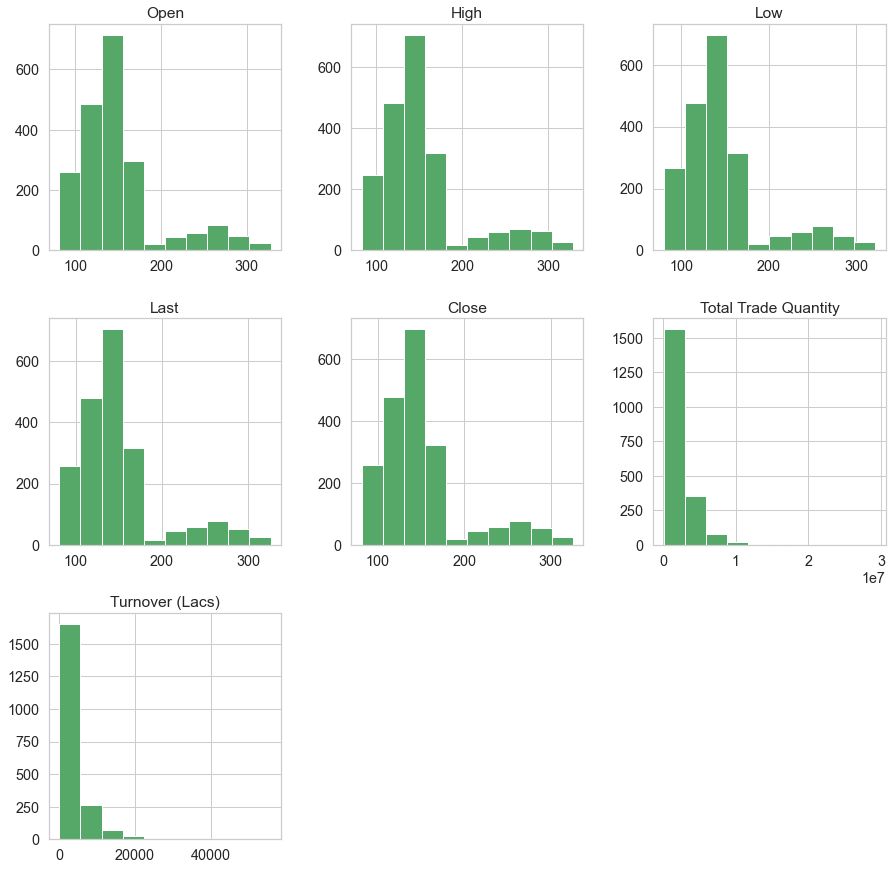

In [17]:
df.hist(figsize = (15,15),color='g')

## Pairplot

<Figure size 504x504 with 0 Axes>

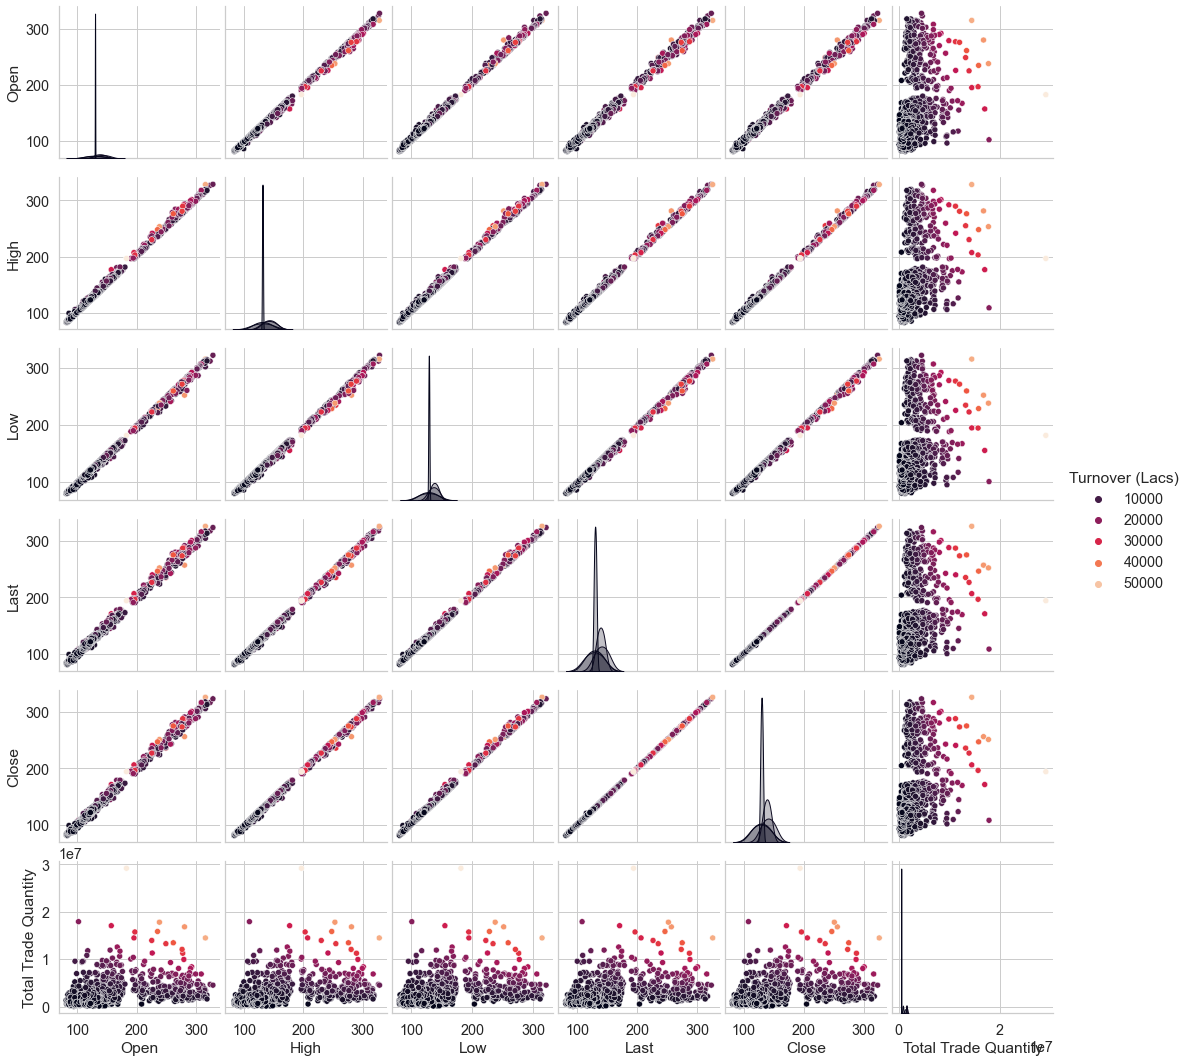

In [20]:
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.pairplot(data=df, hue='Turnover (Lacs)', palette='rocket')

## Correlation

We can corelate the data using heatmap (visual form) and in a tabular form as well, to sort the data easily

In [21]:
dfcor=df.corr()
dfcor

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.00,1.00,1.00,1.00,1.00,0.39,0.61
High,1.00,1.00,1.00,1.00,1.00,0.41,0.63
Low,1.00,1.00,1.00,1.00,1.00,0.38,0.61
Last,1.00,1.00,1.00,1.00,1.00,0.40,0.62
Close,1.00,1.00,1.00,1.00,1.00,0.40,0.62
Total Trade Quantity,0.39,0.41,0.38,0.40,0.40,1.00,0.93
Turnover (Lacs),0.61,0.63,0.61,0.62,0.62,0.93,1.00


### Visual Form (Heatmap)

<AxesSubplot:>

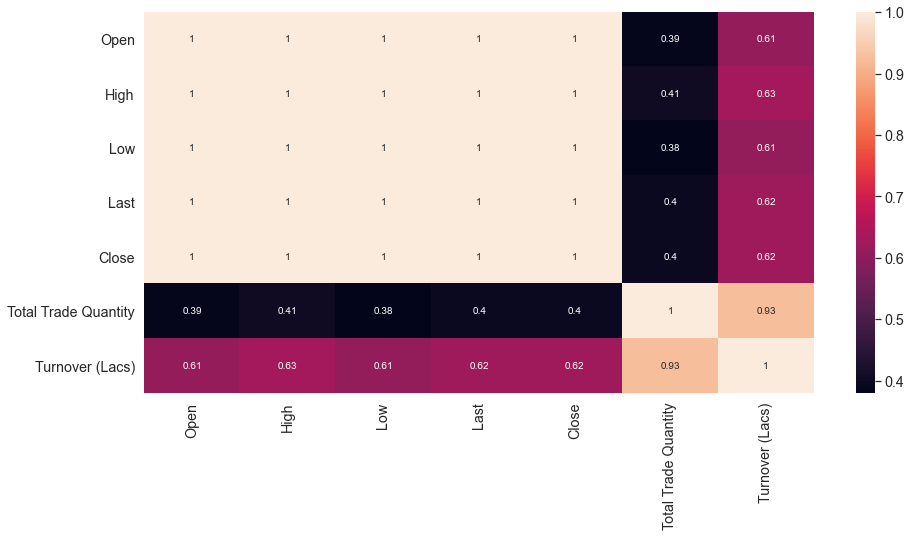

In [22]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

### Tabular Form, to see the top co-relations more easily

In [23]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [24]:
def corrank(X):
    import itertools
    df = pd.DataFrame([[i,j,X.corr().loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))],columns=['Feature1','Feature2','corr'])    
    return df.sort_values(by='corr',ascending=False).reset_index(drop=True)

# prints a descending list of correlation pair (Max on top)
display_all(corrank(df))

,Feature1,Feature2,corr
0,Last,Close,1.00
1,High,Close,1.00
2,High,Last,1.00
3,Low,Close,1.00
4,Low,Last,1.00
5,Open,High,1.00
6,Open,Low,1.00
7,High,Low,1.00
8,Open,Close,1.00
9,Open,Last,1.00


## Handling Outlier

Open                        AxesSubplot(0.125,0.71587;0.133621x0.16413)
High                     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Low                       AxesSubplot(0.44569,0.71587;0.133621x0.16413)
Last                     AxesSubplot(0.606034,0.71587;0.133621x0.16413)
Close                    AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Trade Quantity       AxesSubplot(0.125,0.518913;0.133621x0.16413)
Turnover (Lacs)         AxesSubplot(0.285345,0.518913;0.133621x0.16413)
dtype: object

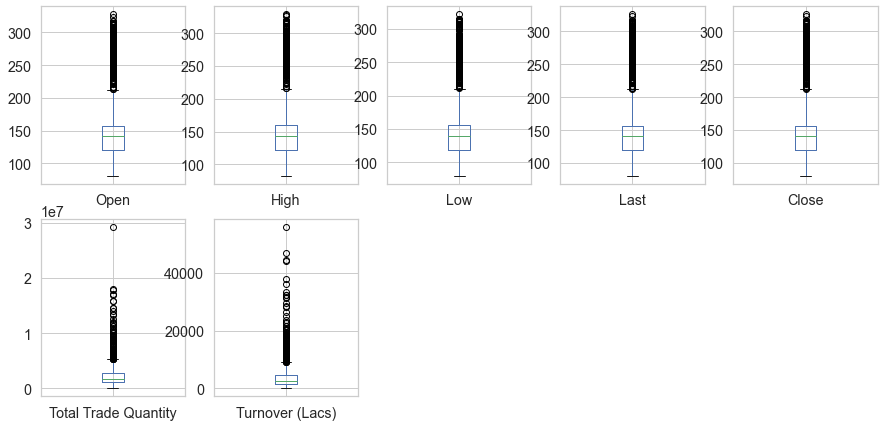

In [25]:
# Plotting the Boxplot for each column to check the outlier
df.plot(kind="box", subplots= True, layout= (4,5), figsize= (15,15))

In [30]:
df_close=df.reset_index()['Close']
df_close

0      233.75
1      233.25
2      234.25
3      236.10
4      233.30
5      234.60
6      234.90
7      235.05
8      236.60
9      233.95
10     222.65
11     216.00
12     222.00
13     222.95
14     221.05
15     222.40
16     223.70
17     236.70
18     234.30
19     236.00
20     234.55
21     233.35
22     237.05
23     231.00
24     235.45
25     240.55
26     245.15
27     243.00
28     239.35
29     237.55
30     234.55
31     233.55
32     237.30
33     236.35
34     237.60
35     239.50
36     234.65
37     235.45
38     235.65
39     246.90
40     242.20
41     242.25
42     239.10
43     236.90
44     246.30
45     243.30
46     238.60
47     233.10
48     238.65
49     247.90
50     243.25
51     258.90
52     265.20
53     269.80
54     274.75
55     275.25
56     266.30
57     271.25
58     277.30
59     281.00
60     264.45
61     269.35
62     263.95
63     265.60
64     267.35
65     264.50
66     262.10
67     258.20
68     260.85
69     267.05
70     275.35
71    

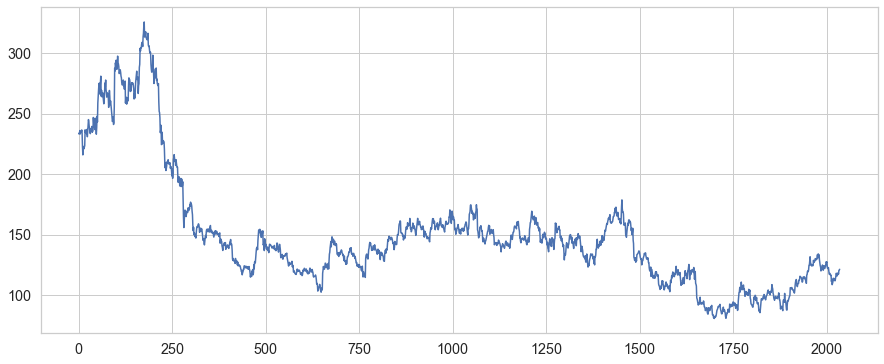

In [34]:
plt.figure(figsize=(15,6))
plt.plot(df_close, c= "b")
plt.show()

In [32]:
df_high=df.reset_index()['High']
df_high

0      235.95
1      236.80
2      240.00
3      236.75
4      239.20
5      237.00
6      237.20
7      239.25
8      238.00
9      236.70
10     223.70
11     225.40
12     235.15
13     224.50
14     225.00
15     224.60
16     238.20
17     243.55
18     239.75
19     237.30
20     237.70
21     239.30
22     239.35
23     237.20
24     240.60
25     246.90
26     247.00
27     244.50
28     242.00
29     238.50
30     236.45
31     237.95
32     239.85
33     240.50
34     241.55
35     240.45
36     239.00
37     238.05
38     254.95
39     249.65
40     247.00
41     243.95
42     242.95
43     248.50
44     249.20
45     244.25
46     240.95
47     243.30
48     249.60
49     251.85
50     257.90
51     265.75
52     272.45
53     275.45
54     277.80
55     276.20
56     273.25
57     282.40
58     281.00
59     284.50
60     273.10
61     270.15
62     268.25
63     268.40
64     269.70
65     266.95
66     263.55
67     262.35
68     264.75
69     274.65
70     276.85
71    

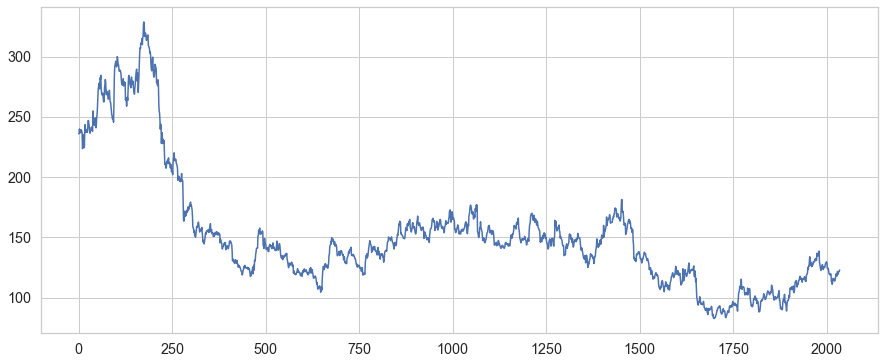

In [35]:
plt.figure(figsize=(15,6))
plt.plot(df_high, c= "b")
plt.show()

# Machine Learning (Model Building)

## Importing Libraries

In [38]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score ,mean_absolute_error,mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [39]:
scaler = MinMaxScaler(feature_range = (0,1))
df_high = scaler.fit_transform(np.array(df_high).reshape(-1,1))
df_high.shape
df_high

array([[0.62268754],
       [0.62614353],
       [0.6391543 ],
       ...,
       [0.15917869],
       [0.15938199],
       [0.16344786]])

## Train & Test Data

In [41]:
training_size = int(len(df_high) * 0.75)
test_size = len(df_high) - training_size
train_data,test_data = df_high[0:training_size,:], df_high[training_size:len(df_high),:1]
training_size, test_size

(1526, 509)

In [52]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)


In [53]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)


In [54]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [56]:
print(x_train.shape), print(y_train.shape)

(1425, 100, 1)
(1425,)


(None, None)

In [57]:
print(x_test.shape), print(y_test.shape)

(408, 100, 1)
(408,)


(None, None)

In [77]:
!pip install tensorflow

In [83]:
!pip install keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

In [ ]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

In [ ]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)